In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from pathlib import Path

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv("Detail_Incident.csv", sep=";", decimal=',')

In [4]:
df.dtypes

CI Name (aff)                   object
CI Type (aff)                   object
CI Subtype (aff)                object
Service Component WBS (aff)     object
Incident ID                     object
Status                          object
Impact                         float64
Urgency                         object
Priority                       float64
Category                        object
KM number                       object
Alert Status                    object
# Reassignments                float64
Open Time                       object
Reopen Time                     object
Resolved Time                   object
Close Time                      object
Handle Time (Hours)            float64
Closure Code                    object
# Related Interactions         float64
Related Interaction             object
# Related Incidents            float64
# Related Changes              float64
Related Change                  object
CI Name (CBy)                   object
CI Type (CBy)            

In [5]:
df.columns

Index(['CI Name (aff)', 'CI Type (aff)', 'CI Subtype (aff)',
       'Service Component WBS (aff)', 'Incident ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'Category', 'KM number', 'Alert Status',
       '# Reassignments', 'Open Time', 'Reopen Time', 'Resolved Time',
       'Close Time', 'Handle Time (Hours)', 'Closure Code',
       '# Related Interactions', 'Related Interaction', '# Related Incidents',
       '# Related Changes', 'Related Change', 'CI Name (CBy)', 'CI Type (CBy)',
       'CI Subtype (CBy)', 'ServiceComp WBS (CBy)', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54',

In [6]:
df.dropna(axis='columns', how='all', inplace=True)

In [7]:
df.shape

(46809, 28)

In [8]:
df.dropna(axis='rows', how='all', inplace=True)

In [9]:
df.shape

(46606, 28)

In [10]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('#', 'Count')

In [11]:
df.columns

Index(['CI_Name_aff', 'CI_Type_aff', 'CI_Subtype_aff',
       'Service_Component_WBS_aff', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'Category', 'KM_number', 'Alert_Status',
       'Count_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_Hours', 'Closure_Code',
       'Count_Related_Interactions', 'Related_Interaction',
       'Count_Related_Incidents', 'Count_Related_Changes', 'Related_Change',
       'CI_Name_CBy', 'CI_Type_CBy', 'CI_Subtype_CBy', 'ServiceComp_WBS_CBy'],
      dtype='object')

In [50]:
df.tail()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Status,Impact,Urgency,Priority,Category,KM_number,Alert_Status,Count_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4.0,4,4.0,incident,KM0001314,closed,0.0,31/03/2014 16:23:42,NaN,31/03/2014 16:29:21,31/03/2014 16:29:24,0.095000,Other,1.0,SD0147021,NaN,NaN,NaN,SBA000464,application,Server Based Application,WBS000073
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4.0,4,4.0,incident,KM0002360,closed,0.0,31/03/2014 15:03:45,NaN,31/03/2014 15:29:19,31/03/2014 15:29:27,0.428333,User error,1.0,SD0146967,NaN,NaN,NaN,SBA000461,application,Server Based Application,WBS000073
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5.0,5,5.0,incident,KM0000315,closed,0.0,31/03/2014 15:28:22,NaN,31/03/2014 15:32:37,31/03/2014 15:32:40,0.071667,Hardware,1.0,SD0146982,NaN,NaN,NaN,LAP000019,computer,Laptop,WBS000091
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4.0,4,4.0,incident,KM0001287,closed,0.0,31/03/2014 15:35:35,NaN,31/03/2014 15:42:34,31/03/2014 15:42:36,0.116944,Software,1.0,SD0146986,NaN,NaN,NaN,WBA000058,application,Web Based Application,WBS000073
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3.0,3,3.0,incident,KM0000182,closed,0.0,31/03/2014 17:24:49,NaN,31/03/2014 22:47:29,31/03/2014 22:47:32,0.586389,Hardware,1.0,SD0147088,NaN,NaN,NaN,DCE000077,hardware,DataCenterEquipment,WBS000267


In [14]:
df.Urgency.value_counts()

4               18349
5               14094
3                5362
4                4239
5                2685
3                1174
2                 607
2                  89
1                   4
1                   2
5 - Very Low        1
Name: Urgency, dtype: int64

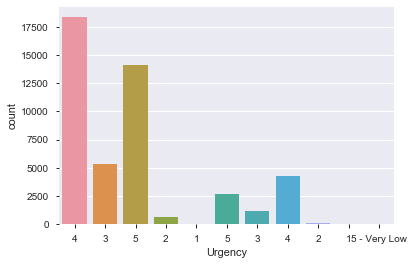

In [17]:
sns.countplot(x='Urgency', data=df)

In [51]:
colsDatetime = ['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time']

In [52]:
for i in colsDatetime:
    df[i] = pd.to_datetime(df[i], format='%d/%m/%Y %H:%M:%S', errors='coerce' )

In [53]:
df.dtypes

CI_Name_aff                           object
CI_Type_aff                           object
CI_Subtype_aff                        object
Service_Component_WBS_aff             object
Incident_ID                           object
Status                                object
Impact                               float64
Urgency                               object
Priority                             float64
Category                              object
KM_number                             object
Alert_Status                          object
Count_Reassignments                  float64
Open_Time                     datetime64[ns]
Reopen_Time                   datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_Hours                    float64
Closure_Code                          object
Count_Related_Interactions           float64
Related_Interaction                   object
Count_Related_Incidents              float64
Count_Rela

In [54]:
df.head(30)

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Status,Impact,Urgency,Priority,Category,KM_number,Alert_Status,Count_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4,4.0,incident,KM0000553,closed,26.0,2012-02-05 13:32:57,NaT,2013-11-04 13:50:27,2013-11-04 13:51:17,3871.691111,Other,1.0,SD0000007,2.0,NaN,NaN,SUB000508,subapplication,Web Based Application,WBS000162
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3,3.0,incident,KM0000611,closed,33.0,2012-03-12 15:44:24,2013-12-02 12:31:02,2013-12-02 12:36:21,2013-12-02 12:36:25,4354.786389,Software,1.0,SD0000011,1.0,NaN,NaN,WBA000124,application,Web Based Application,WBS000088
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,3.0,3,3.0,request for information,KM0000339,closed,3.0,2012-03-29 12:36:01,NaT,2014-01-13 15:12:38,2014-01-13 15:13:11,4843.119444,No error - works as designed,1.0,SD0000017,NaN,NaN,NaN,DTA000024,application,Desktop Application,WBS000092
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4,4.0,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,NaT,2013-11-14 09:31:09,2013-11-14 09:31:24,43.218333,Operator error,1.0,SD0000025,NaN,NaN,NaN,WBA000124,application,Web Based Application,WBS000088
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4,4.0,incident,KM0000611,closed,2.0,2012-08-10 11:01:40,NaT,2013-11-08 13:55:49,2013-11-08 13:55:52,3383.903333,Other,1.0,SD0000029,NaN,NaN,NaN,SUB000508,subapplication,Web Based Application,WBS000162
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4.0,4,4.0,incident,KM0000611,closed,4.0,2012-08-10 11:27:59,NaT,2013-11-08 13:54:07,2013-11-08 13:54:12,3383.436944,Other,1.0,SD0000031,NaN,NaN,NaN,SUB000508,subapplication,Web Based Application,WBS000162
6,WBA000082,application,Web Based Application,WBS000055,IM0000014,Closed,4.0,4,4.0,incident,KM0000401,closed,2.0,2012-08-15 14:17:55,NaT,2013-12-27 10:59:28,2013-12-27 10:59:32,3703.191389,Unknown,1.0,SD0000033,NaN,NaN,NaN,WBA000082,application,Web Based Application,WBS000055
7,WBA000124,application,Web Based Application,WBS000088,IM0000015,Closed,4.0,4,4.0,incident,KM0000611,closed,5.0,2012-08-22 16:31:42,NaT,2013-11-08 14:09:05,2013-11-08 14:09:09,3294.624167,Other,1.0,SD0000034,NaN,NaN,NaN,WBA000124,application,Web Based Application,WBS000088
8,WBA000124,application,Web Based Application,WBS000088,IM0000017,Closed,3.0,3,3.0,incident,KM0000611,closed,2.0,2012-08-29 15:59:14,NaT,2013-11-08 14:02:06,2013-11-08 14:02:20,0.862778,Other,1.0,SD0000036,NaN,NaN,NaN,#N/B,#N/B,#N/B,#N/B
9,WBA000082,application,Web Based Application,WBS000055,IM0000018,Closed,4.0,4,4.0,incident,KM0000401,closed,2.0,2012-09-03 16:04:05,NaT,2013-11-08 14:33:43,2013-11-08 14:35:42,3211.526944,No error - works as designed,1.0,SD0000037,NaN,NaN,NaN,#N/B,#N/B,#N/B,#N/B


In [55]:
df.tail()


,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Status,Impact,Urgency,Priority,Category,KM_number,Alert_Status,Count_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4.0,4,4.0,incident,KM0001314,closed,0.0,2014-03-31 16:23:42,NaT,2014-03-31 16:29:21,2014-03-31 16:29:24,0.095000,Other,1.0,SD0147021,NaN,NaN,NaN,SBA000464,application,Server Based Application,WBS000073
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4.0,4,4.0,incident,KM0002360,closed,0.0,2014-03-31 15:03:45,NaT,2014-03-31 15:29:19,2014-03-31 15:29:27,0.428333,User error,1.0,SD0146967,NaN,NaN,NaN,SBA000461,application,Server Based Application,WBS000073
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5.0,5,5.0,incident,KM0000315,closed,0.0,2014-03-31 15:28:22,NaT,2014-03-31 15:32:37,2014-03-31 15:32:40,0.071667,Hardware,1.0,SD0146982,NaN,NaN,NaN,LAP000019,computer,Laptop,WBS000091
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4.0,4,4.0,incident,KM0001287,closed,0.0,2014-03-31 15:35:35,NaT,2014-03-31 15:42:34,2014-03-31 15:42:36,0.116944,Software,1.0,SD0146986,NaN,NaN,NaN,WBA000058,application,Web Based Application,WBS000073
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3.0,3,3.0,incident,KM0000182,closed,0.0,2014-03-31 17:24:49,NaT,2014-03-31 22:47:29,2014-03-31 22:47:32,0.586389,Hardware,1.0,SD0147088,NaN,NaN,NaN,DCE000077,hardware,DataCenterEquipment,WBS000267


In [64]:
df.Impact = df.Impact.astype(str).str[:1]
df.Priority = df.Priority.astype(str).str[:1]
df.Urgency = df.Urgency.astype(str).str[:1]

In [65]:
df.Urgency.value_counts()

4    22588
5    16780
3     6536
2      696
1        6
Name: Urgency, dtype: int64

In [66]:
df.dtypes


CI_Name_aff                           object
CI_Type_aff                           object
CI_Subtype_aff                        object
Service_Component_WBS_aff             object
Incident_ID                           object
Status                                object
Impact                                object
Urgency                               object
Priority                              object
Category                              object
KM_number                             object
Alert_Status                          object
Count_Reassignments                  float64
Open_Time                     datetime64[ns]
Reopen_Time                   datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_Hours                    float64
Closure_Code                          object
Count_Related_Interactions           float64
Related_Interaction                   object
Count_Related_Incidents              float64
Count_Rela

In [67]:
df[df['Status'] == "Work in progress"]

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Status,Impact,Urgency,Priority,Category,KM_number,Alert_Status,Count_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy
3492,CBD000824,computer,Banking Device,WBS000146,IM0003614,Work in progress,4,4,4,incident,KM0000266,closed,3.0,2013-10-08 13:10:12,NaT,2013-10-09 08:55:09,2013-10-09 08:55:21,6.252500,Hardware,1.0,SD0008234,NaN,NaN,NaN,CBD000824,computer,Banking Device,WBS000146
4254,CBD000863,computer,Banking Device,WBS000146,IM0004380,Work in progress,2,2,2,incident,KM0000274,closed,0.0,2013-10-10 11:48:00,NaT,2013-10-10 13:20:40,2013-10-10 13:20:45,1.545833,Other,1.0,SD0010529,NaN,NaN,NaN,CBD000863,computer,Banking Device,WBS000146
4807,CBD000857,computer,Banking Device,WBS000146,IM0004937,Work in progress,2,2,2,incident,KM0000274,closed,1.0,2013-10-14 11:24:22,NaT,2013-10-14 14:05:33,2013-10-14 14:05:36,2.687222,Other,1.0,SD0012422,NaN,NaN,NaN,CBD000857,computer,Banking Device,WBS000146
5868,CBD000399,computer,Banking Device,WBS000146,IM0006014,Work in progress,3,3,3,incident,KM0000274,closed,1.0,2013-10-16 13:04:20,NaT,2013-10-16 13:41:46,2013-10-16 13:41:50,0.625000,Hardware,1.0,SD0015040,NaN,NaN,NaN,CBD000399,computer,Banking Device,WBS000146
6797,CBD000503,computer,Banking Device,WBS000146,IM0006951,Work in progress,4,4,4,incident,KM0000281,closed,2.0,2013-10-21 12:38:54,NaT,2013-10-21 16:41:18,2013-10-21 16:42:27,4.059167,Unknown,1.0,SD0018013,NaN,NaN,NaN,CBD000503,computer,Banking Device,WBS000146
7479,CBD000308,computer,Banking Device,WBS000146,IM0007636,Work in progress,3,3,3,incident,KM0000280,closed,0.0,2013-10-23 12:10:35,NaT,2013-10-23 12:21:54,2013-10-23 12:21:57,0.189444,Unknown,1.0,SD0020154,NaN,NaN,NaN,CBD000308,computer,Banking Device,WBS000146
7964,CBD000379,computer,Banking Device,WBS000146,IM0008124,Work in progress,3,3,3,incident,KM0000280,closed,3.0,2013-10-24 14:31:14,NaT,2013-10-28 17:18:17,2013-10-28 17:18:20,23.785000,Other,1.0,SD0021394,NaN,NaN,NaN,CBD000379,computer,Banking Device,WBS000146
8315,CBD001200,computer,Banking Device,WBS000146,IM0008477,Work in progress,2,2,2,incident,KM0000493,closed,1.0,2013-10-28 10:08:53,NaT,2013-10-28 14:20:00,2013-10-28 14:20:03,4.185000,Other,1.0,SD0022980,NaN,NaN,NaN,CBD001200,computer,Banking Device,WBS000146
8666,CBD001205,computer,Banking Device,WBS000146,IM0008829,Work in progress,4,4,4,incident,KM0000281,closed,1.0,2013-10-28 15:03:18,NaT,2013-10-29 17:01:23,2013-10-29 17:01:26,12.468889,Hardware,1.0,SD0023574,NaN,NaN,NaN,CBD001205,computer,Banking Device,WBS000146


In [69]:
with open("1.a.Detail_Incident.csv",'w') as f:
    df.to_csv(f, index=False)

In [70]:
profile = ProfileReport(df, title="Profile of BPIC 2014 Detail_Incident Data after Initial Cleaning", html={'style': {'full_width': True}})

In [71]:
profile.to_file(Path(str("1.b.Detail_Incident_Profile.html")))